## Final Project Submission

Please fill out:
* Student name: Paul Raymond
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

__Import initial libraries and packages__

In [2]:
#import standard libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


#move to appropriate sections#
#
import glob
#
from datetime import datetime, date
#
from pandas.core import datetools
from pandas import Series
#
import pandas.tseries
import statsmodels.api as sm
#
import warnings
warnings.filterwarnings('ignore')
#
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
#
import itertools
#
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
#
from scipy.spatial.distance import euclidean as euc
#
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus

___Exploratory Data Analysis___

__Import files and compile the rows__

_Create loop to load each file in the Articles folder_

In [3]:
path = '/Users/paulraymond/Downloads/nyt-comments/Articles'
all_files = glob.glob(path + "/*")

files = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header=0)
    files.append(df)
    
data = pd.concat(files, axis=0, ignore_index=True)
data

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58927e0495d0e0392607e1b3,1129,By KEN BELSON,article,N.F.L. vs. Politics Has Been Battle All Season...,"['Football', 'Super Bowl', 'National Football ...",1,Sports,12,2017-02-02 00:26:16,Pro Football,Despite the national tumult over immigration s...,The New York Times,News,https://www.nytimes.com/2017/02/01/sports/supe...
1,NaN,5893033d95d0e0392607e2d6,3082,By UNKNOWN,article,Voice. Vice. Veracity.,"['Television', 'Home Box Office', 'Girls (TV P...",1,Arts&Leisure,1,2017-02-02 10:00:24,Television,Our critics look at the impact of the HBO show...,The New York Times,News,https://www.nytimes.com/2017/02/02/arts/televi...
2,NaN,5893039595d0e0392607e2da,693,By MANOHLA DARGIS,article,A Stand-Up’s Downward Slide,"['Movies', 'The Comedian (Movie)', 'De Niro, R...",1,Weekend,5,2017-02-02 10:01:53,Unknown,Joined by a cast that includes Edie Falco and ...,The New York Times,Review,https://www.nytimes.com/2017/02/02/movies/the-...
3,NaN,5893109995d0e0392607e2ef,1049,By ALEXANDRA S. LEVINE,article,New York Today: A Groundhog Has Her Day,"['New York City', 'Groundhogs']",1,Metro,0,2017-02-02 10:57:25,Unknown,Thursday: A meet-and-greet with Staten Island ...,The New York Times,briefing,https://www.nytimes.com/2017/02/02/nyregion/ne...
4,NaN,5893114495d0e0392607e2f1,1283,By BONNIE TSUI,article,A Swimmer’s Communion With the Ocean,"['Travel and Vacations', 'Swimming', 'Oceans a...",1,Travel,4,2017-02-02 11:00:03,Unknown,"“We swam in that heaving body of aquamarine, a...",The New York Times,News,https://www.nytimes.com/2017/02/02/travel/hawa...
5,NaN,5892a0d995d0e0392607e1fb,837,By CAITLIN LOVINGER,article,Trail Activity,['Crossword Puzzles'],1,Games,0,2017-02-02 03:00:33,Unknown,A debut by Alex Eaton-Salners looks both ways.,The New York Times,News,https://www.nytimes.com/2017/02/01/crosswords/...
6,NaN,5892e7bd95d0e0392607e281,97,By KATHERINE SCHULTEN,article,Super Bowl,[],1,Learning,0,2017-02-02 08:03:02,Unknown,"Whether you’re a football fan or not, what do ...",The New York Times,News,https://www.nytimes.com/2017/02/02/learning/su...
7,NaN,5892ec0795d0e0392607e28c,870,By IOAN GRILLO,article,Trump’s Mexican Shakedown,"['Trump, Donald J', 'Mexico', 'Border Barriers...",1,OpEd,27,2017-02-02 08:21:23,Unknown,You just can’t force a neighboring country to ...,The New York Times,Op-Ed,https://www.nytimes.com/2017/02/02/opinion/tru...
8,NaN,5892ec0795d0e0392607e28f,804,By GAIL COLLINS,article,Pence’s Presidential Pet,"['Trump, Donald J', 'Supreme Court (US)', 'Pen...",1,OpEd,27,2017-02-02 08:21:23,Unknown,Whose hand is busy behind the curtain?,The New York Times,Op-Ed,https://www.nytimes.com/2017/02/02/opinion/pen...
9,NaN,5892ec0795d0e0392607e28e,864,By CHARLES M. BLOW,article,Fruit of a Poison Tree,"['United States Politics and Government', 'App...",1,OpEd,0,2017-02-02 08:21:23,Unknown,Democrats must oppose Neil Gorsuch on principle.,The New York Times,Op-Ed,https://www.nytimes.com/2017/02/02/opinion/fru...


In [4]:
#view the columns and row info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 16 columns):
abstract            134 non-null object
articleID           8339 non-null object
articleWordCount    8339 non-null int64
byline              8339 non-null object
documentType        8339 non-null object
headline            8339 non-null object
keywords            8339 non-null object
multimedia          8339 non-null int64
newDesk             8339 non-null object
printPage           8339 non-null int64
pubDate             8339 non-null object
sectionName         8339 non-null object
snippet             8339 non-null object
source              8339 non-null object
typeOfMaterial      8339 non-null object
webURL              8339 non-null object
dtypes: int64(3), object(13)
memory usage: 1.0+ MB


Will need to convert pubDate to a date type

In [5]:
# View info on numerical columns
data.describe()

,articleWordCount,multimedia,printPage
count,8339.000000,8339.000000,8339.000000
mean,1109.057321,27.795899,6.738938
std,831.475454,32.052564,10.145362
min,11.000000,0.000000,0.000000
25%,731.500000,1.000000,0.000000
50%,1008.000000,3.000000,1.000000
75%,1322.500000,68.000000,11.000000
max,16336.000000,68.000000,198.000000


In [6]:
# what is article breakdown by type of material?
material_articles = data.groupby('typeOfMaterial')['articleID'].count().sort_values(ascending=False)
material_articles

typeOfMaterial
News               5596
Op-Ed              1497
Review              447
briefing            275
Editorial           260
Blog                134
News Analysis        47
Brief                31
Obituary (Obit)      24
Question             15
Letter                9
Biography             2
Interview             1
An Appraisal          1
Name: articleID, dtype: int64

In [7]:
#what is article breakdown by category?
category_articles = data.groupby('newDesk')['articleID'].count().sort_values(ascending=False)
category_articles

newDesk
OpEd               1528
National            560
Metro               530
Learning            507
Culture             458
Foreign             443
Business            382
Washington          378
Magazine            329
Dining              320
Games               320
Well                305
Sports              288
Editorial           276
Science             253
RealEstate          205
Upshot              198
Insider             130
Weekend             120
Travel              102
Unknown              98
Arts&Leisure         68
BookReview           56
Styles               56
SundayBusiness       53
Metropolitan         51
Podcasts             40
Photo                39
NewsDesk             32
Climate              31
Smarter Living       31
Investigative        28
Obits                22
Politics             22
Express              19
SpecialSections      18
TStyle               14
EdLife               11
Letters               5
Summary               4
NYTNow                4
Video   

In [8]:
# Which article was 11 words?
# df.loc[df['column_name'] == some_value]

In [9]:
shortest_article = data.loc[data['articleWordCount'] == 11]
shortest_article

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
59,Maybe you’re crazy. Probably.,5895098c95d0e0392607e8f2,11,By UNKNOWN,blogpost,Unknown,['News'],0,Unknown,0,2017-02-03 22:49:45,Unknown,Maybe you’re crazy. Probably.,The New York Times,Blog,https://krugman.blogs.nytimes.com/2017/02/03/f...


In [10]:
#16K+ words?
longest_article = data.loc[data['articleWordCount'] == 16336]
longest_article

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
6907,NaN,5a8f533b10f40f00018c2848,16336,By THE LEARNING NETWORK,article,"On the Shooting in Florida, Student Activism, ...",[],68,Learning,0,2018-02-22 23:33:05,Unknown,The best teenage comments from last week’s wri...,The New York Times,News,https://www.nytimes.com/2018/02/22/learning/on...


_Convert necessary columns_

In [11]:
# datetime.strptime(data['pubDate'], '%Y-%m-%d')

In [12]:
data['pubDate']= pd.to_datetime(data['pubDate'])
data.pubDate
data['date'] = data['pubDate'].dt.date
data.date = pd.to_datetime(data.date)
data.head()

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,date
0,NaN,58927e0495d0e0392607e1b3,1129,By KEN BELSON,article,N.F.L. vs. Politics Has Been Battle All Season...,"['Football', 'Super Bowl', 'National Football ...",1,Sports,12,2017-02-02 00:26:16,Pro Football,Despite the national tumult over immigration s...,The New York Times,News,https://www.nytimes.com/2017/02/01/sports/supe...,2017-02-02
1,NaN,5893033d95d0e0392607e2d6,3082,By UNKNOWN,article,Voice. Vice. Veracity.,"['Television', 'Home Box Office', 'Girls (TV P...",1,Arts&Leisure,1,2017-02-02 10:00:24,Television,Our critics look at the impact of the HBO show...,The New York Times,News,https://www.nytimes.com/2017/02/02/arts/televi...,2017-02-02
2,NaN,5893039595d0e0392607e2da,693,By MANOHLA DARGIS,article,A Stand-Up’s Downward Slide,"['Movies', 'The Comedian (Movie)', 'De Niro, R...",1,Weekend,5,2017-02-02 10:01:53,Unknown,Joined by a cast that includes Edie Falco and ...,The New York Times,Review,https://www.nytimes.com/2017/02/02/movies/the-...,2017-02-02
3,NaN,5893109995d0e0392607e2ef,1049,By ALEXANDRA S. LEVINE,article,New York Today: A Groundhog Has Her Day,"['New York City', 'Groundhogs']",1,Metro,0,2017-02-02 10:57:25,Unknown,Thursday: A meet-and-greet with Staten Island ...,The New York Times,briefing,https://www.nytimes.com/2017/02/02/nyregion/ne...,2017-02-02
4,NaN,5893114495d0e0392607e2f1,1283,By BONNIE TSUI,article,A Swimmer’s Communion With the Ocean,"['Travel and Vacations', 'Swimming', 'Oceans a...",1,Travel,4,2017-02-02 11:00:03,Unknown,"“We swam in that heaving body of aquamarine, a...",The New York Times,News,https://www.nytimes.com/2017/02/02/travel/hawa...,2017-02-02


In [13]:
# data['date']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 17 columns):
abstract            134 non-null object
articleID           8339 non-null object
articleWordCount    8339 non-null int64
byline              8339 non-null object
documentType        8339 non-null object
headline            8339 non-null object
keywords            8339 non-null object
multimedia          8339 non-null int64
newDesk             8339 non-null object
printPage           8339 non-null int64
pubDate             8339 non-null datetime64[ns]
sectionName         8339 non-null object
snippet             8339 non-null object
source              8339 non-null object
typeOfMaterial      8339 non-null object
webURL              8339 non-null object
date                8339 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(12)
memory usage: 1.1+ MB


In [14]:
data.date.unique()

array(['2017-02-02T00:00:00.000000000', '2017-02-03T00:00:00.000000000',
       '2017-02-04T00:00:00.000000000', '2017-02-05T00:00:00.000000000',
       '2017-02-06T00:00:00.000000000', '2017-02-07T00:00:00.000000000',
       '2017-02-08T00:00:00.000000000', '2017-02-09T00:00:00.000000000',
       '2017-02-10T00:00:00.000000000', '2017-02-11T00:00:00.000000000',
       '2017-02-12T00:00:00.000000000', '2017-02-13T00:00:00.000000000',
       '2017-02-14T00:00:00.000000000', '2017-02-15T00:00:00.000000000',
       '2017-02-16T00:00:00.000000000', '2017-02-17T00:00:00.000000000',
       '2017-02-18T00:00:00.000000000', '2017-02-19T00:00:00.000000000',
       '2017-02-20T00:00:00.000000000', '2017-02-21T00:00:00.000000000',
       '2017-02-22T00:00:00.000000000', '2017-02-23T00:00:00.000000000',
       '2017-02-24T00:00:00.000000000', '2017-02-25T00:00:00.000000000',
       '2017-02-26T00:00:00.000000000', '2017-02-27T00:00:00.000000000',
       '2017-02-28T00:00:00.000000000', '2017-03-01

_Complete exploratory analysis on the Articles data_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c6b9160>,
      dtype=object)

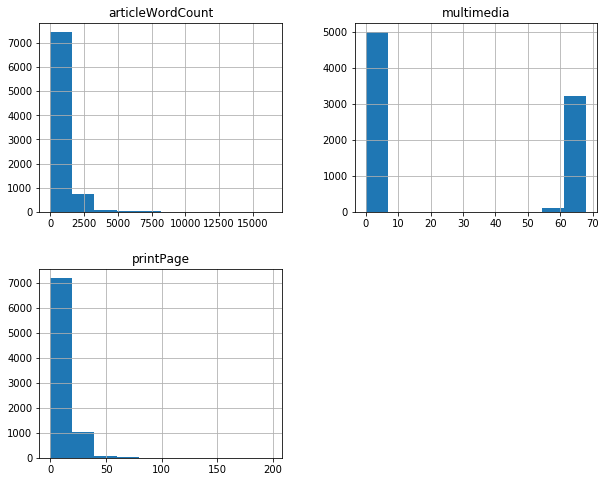

In [15]:
data.hist(figsize=(10,8))

_Group data by various categories_ 

In [16]:
total_words_author = data.groupby('byline')['articleWordCount'].sum().sort_values(ascending=False)

In [17]:
total_words_author.head()

byline
By THE EDITORIAL BOARD     170169
By DEB AMLEN               136485
By THE LEARNING NETWORK     94823
By ALEXANDRA S. LEVINE      85997
By PAUL KRUGMAN             79564
Name: articleWordCount, dtype: int64

In [18]:
total_articles_author = data.groupby('byline')['byline'].count().sort_values(ascending=False)

In [19]:
total_articles_author.head()

byline
By DEB AMLEN                  233
By THE EDITORIAL BOARD        224
By CAROLINE CROSSON GILPIN    159
By NATALIE PROULX             111
By PAUL KRUGMAN               103
Name: byline, dtype: int64

__Check for normality and multicolinearity__

In [20]:
# create dataframe and fix columns
## can categorical data be included in multicolinearity?
# data.info()
# data.head()

In [21]:
# normalize data
data_scale = pd.DataFrame()
data_scale['articleWordCount'] = (data['articleWordCount'] - data['articleWordCount'].min())/(data['articleWordCount'].max()-data['articleWordCount'].min())
data_scale['multimedia'] = (data['multimedia'] - data['multimedia'].min()) / (data['multimedia'].max()- data['multimedia'].min())
data_scale['printPage'] = (data['printPage']- data['printPage'].min()) / (data['printPage'].max()- data['printPage'].min())

In [22]:
## fix negative and infinite values issue
# data_scale_log = pd.DataFrame()
# data_scale_log['articleWordCount'] = np.log(data_scale['articleWordCount'])
# data_scale_log['multimedia'] = np.log(data_scale['multimedia'])
# data_scale_log['printPage'] = np.log(data_scale['printPage'])
# data_scale_log.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1cb44e48>,
      dtype=object)

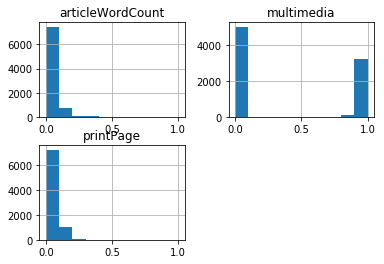

In [23]:
data_scale.hist()

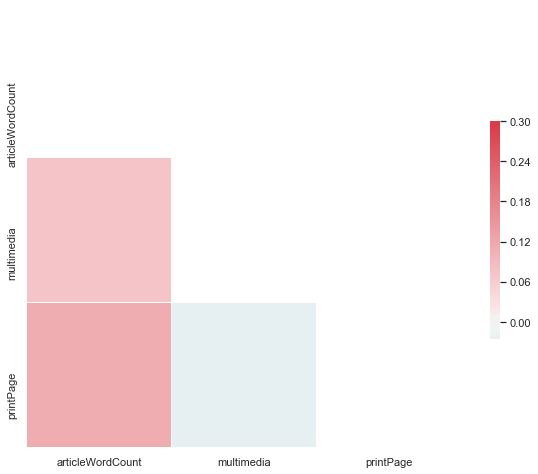

In [24]:
#plot covariance matrix
sns.set(style='white')
corr = data_scale.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

Not much correlation among the numerical categories in the article dataset.

I'll do the same exploratory analysis process for comments.

_Create loop to import comment files_

In [3]:
path2 = '/Users/paulraymond/Downloads/nyt-comments/Comments'
all_files2 = glob.glob(path2 + "/*")

files2 = []

for filename in all_files2:
    df = pd.read_csv(filename, index_col = None, header=0)
    files2.append(df)
    
data2 = pd.concat(files2, axis=0, ignore_index=True)

In [ ]:
#inspect the first rows
data2.head()

In [26]:
data2.typeOfMaterial.unique()

array(['Op-Ed', 'News', 'Editorial', 'News Analysis', 'Review',
       'briefing', 'Biography', 'An Appraisal', 'Brief',
       'Obituary (Obit)', 'Question', 'Blog', 'Letter', 'Interview'],
      dtype=object)

In [27]:
material_comments = data2.groupby('typeOfMaterial')['commentID'].count().sort_values(ascending=False)
material_comments                                                

typeOfMaterial
News               1050659
Op-Ed               666450
Editorial           127167
News Analysis        20562
Review               13783
Blog                  9374
briefing              4969
Obituary (Obit)       4361
Letter                1339
Question               647
Brief                  380
Interview              217
Biography               58
An Appraisal             9
Name: commentID, dtype: int64

In [28]:
#view columns and row info
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899975 entries, 0 to 1899974
Data columns (total 34 columns):
approveDate              int64
articleID                object
articleWordCount         float64
commentBody              object
commentID                float64
commentSequence          float64
commentTitle             object
commentType              object
createDate               float64
depth                    float64
editorsSelection         int64
inReplyTo                float64
newDesk                  object
parentID                 float64
parentUserDisplayName    object
permID                   object
picURL                   object
printPage                float64
recommendations          float64
recommendedFlag          float64
replyCount               float64
reportAbuseFlag          float64
sectionName              object
sharing                  int64
status                   object
timespeople              float64
trusted                  float64
typeOfMateri

In [29]:
#examine the numerical column details
data2.describe()

,approveDate,articleWordCount,commentID,commentSequence,createDate,depth,editorsSelection,inReplyTo,parentID,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sharing,timespeople,trusted,updateDate,userID
count,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,0.0,1.899975e+06,0.0,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06,1.899975e+06
mean,1.504211e+09,1.265181e+03,2.390673e+07,2.390673e+07,1.504200e+09,1.268833e+00,1.900236e-02,6.341086e+06,6.341123e+06,8.897808e+00,1.980795e+01,NaN,4.386637e-01,NaN,8.498112e-02,9.590647e-01,3.486941e-02,1.504212e+09,5.011396e+07
std,1.606672e+07,8.398280e+02,2.302292e+06,2.302290e+06,1.606734e+07,4.532769e-01,1.365331e-01,1.064063e+07,1.064065e+07,1.064724e+01,1.041417e+02,NaN,2.292060e+00,NaN,2.788537e-01,1.981404e-01,1.834490e-01,1.606614e+07,2.347250e+07
min,1.483318e+09,1.100000e+01,2.096371e+07,2.096371e+07,1.483314e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-1.150000e+02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.483318e+09,1.045000e+03
25%,1.488636e+09,8.360000e+02,2.168187e+07,2.168187e+07,1.488626e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,1.000000e+00,0.000000e+00,1.488637e+09,3.282287e+07
50%,1.493591e+09,1.125000e+03,2.232074e+07,2.232074e+07,1.493587e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,1.000000e+00,0.000000e+00,1.493591e+09,5.755677e+07
75%,1.520390e+09,1.442000e+03,2.622889e+07,2.622889e+07,1.520386e+09,2.000000e+00,0.000000e+00,2.113842e+07,2.113843e+07,1.900000e+01,1.000000e+01,NaN,0.000000e+00,NaN,0.000000e+00,1.000000e+00,0.000000e+00,1.520391e+09,6.785563e+07
max,1.525233e+09,1.633600e+04,2.694126e+07,2.694126e+07,1.525233e+09,5.000000e+00,1.000000e+00,2.694099e+07,2.694099e+07,1.980000e+02,1.047200e+04,NaN,6.680000e+02,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.525233e+09,8.585631e+07


I think the most insightful columns for the Comments file are: __comment text__ (of course!), __createDate, inReplyTo, recommendations, recommendedFlag, replyCount, reportAbuseFlag, sharing, timespeople, userID, parentID, editorsSelection, commentSequence__, and __commentID__

_Check for null values_

In [30]:
# data2.isna().sum()

I'll drop the following columns with substantial null values: __parentUserDisplayName, userTitle, userURL__

In [31]:
#drop columns

In [4]:
data2.drop(['parentUserDisplayName', 'userTitle', 'userURL'], axis=1)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation
0,1517529462,5a7258e410f40f00018bed7d,835.0,The snake-filled heads comment made me think o...,25791250.0,25791250.0,<br/>,comment,1.517508e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529462,Jennie,79172841.0,WA
1,1517529428,5a7258e410f40f00018bed7d,835.0,She-devil reporting for duty!,25795675.0,25795675.0,<br/>,comment,1.517527e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529428,Nice White Lady,66376882.0,Seattle
2,1517529427,5a7258e410f40f00018bed7d,835.0,XX is the new mark of the devil.,25792078.0,25792078.0,<br/>,comment,1.517511e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529427,Stan Sutton,27924638.0,"Westchester County, NY"
3,1517529425,5a7258e410f40f00018bed7d,835.0,"""Courtland Sykes"" should be writing for The On...",25791604.0,25791604.0,<br/>,comment,1.517510e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529425,Phil Carson,31909107.0,Denver
4,1517529418,5a7258e410f40f00018bed7d,835.0,"I happen to descend for a few of them, because...",25795241.0,25795241.0,<br/>,comment,1.517525e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529418,Abby,55271958.0,Tucson
5,1517529411,5a7258e410f40f00018bed7d,835.0,I don't care about the details of this troglod...,25791607.0,25791607.0,<br/>,comment,1.517510e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529411,Des Johnson,81426273.0,Forest Hills NY
6,1517529401,5a7258e410f40f00018bed7d,835.0,"As I have grown older, the more I have learned...",25794684.0,25794684.0,<br/>,comment,1.517522e+09,1.0,...,Unknown,1,approved,1.0,0.0,Op-Ed,1517529401,Jacob Sommer,54874472.0,"Medford, MA"
7,1517529401,5a7258e410f40f00018bed7d,835.0,“...a newfound freedom in the Age of Trump to ...,25791082.0,25791082.0,<br/>,comment,1.517508e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529401,Roxie,34966158.0,San Francisco
8,1517529394,5a7258e410f40f00018bed7d,835.0,"""Many women, and some men, were horrified that...",25795138.0,25795138.0,<br/>,comment,1.517524e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529394,Sipa111,73664.0,Seattle
9,1517529373,5a7258e410f40f00018bed7d,835.0,"After reading about Sykes, I'm tempted to feel...",25796019.0,25796019.0,<br/>,comment,1.517529e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529373,Nanci,67991502.0,Pennsylvania


In [33]:
# normalize data
## complete scaling for comments dataset
data2_scale = pd.DataFrame()
data2_scale['articleWordCount'] = (data2['articleWordCount'] - data2['articleWordCount'].min())/(data2['articleWordCount'].max()-data2['articleWordCount'].min())
data2_scale['multimedia'] = (data2['multimedia'] - data2['multimedia'].min()) / (data2['multimedia'].max()- data2['multimedia'].min())
data2_scale['printPage'] = (data2['printPage']- data2['printPage'].min()) / (data2['printPage'].max()- data2['printPage'].min())


KeyError: 'multimedia'

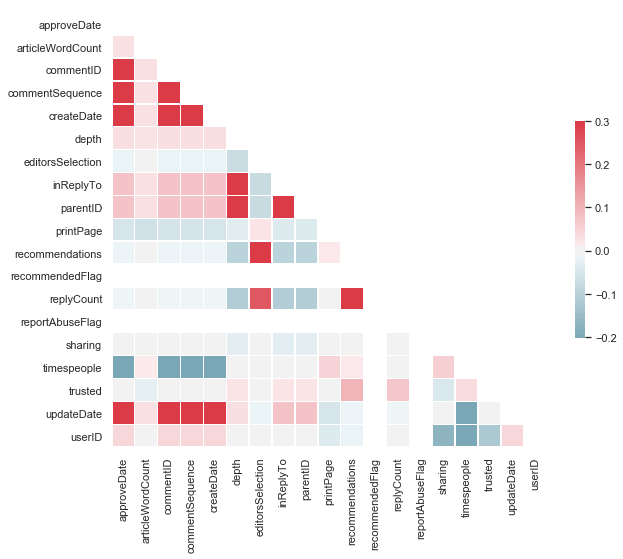

In [34]:
#plot covariance matrix
sns.set(style='white')
corr = data2.corr() #update with normalized dataset
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [35]:
# There also seems to be low correlation for the Comments dataset

In [36]:
#which articles had the most comments?
data2_article_totalcomments = data2.groupby('articleID')['commentID'].count().sort_values(ascending=False)
data2_article_totalcomments

articleID
58b0894195d0e0247463875e    6024
58ebb1437c459f24986d96ed    5181
588c96bb95d0e0392607d4f2    5135
58d525e17c459f247805dc9e    5022
58cbec937c459f247805c6e6    4276
58bc2bd17c459f2525d1fecb    4172
588f882495d0e0392607d9a5    3936
58ac68f595d0e02474637c29    3833
587575d295d0e0392607a033    3829
5acbc4e2068401528a2a5a2c    3823
588e0b1e95d0e0392607d69a    3641
58badf2e7c459f2525d1fd2b    3603
58a3b8dc95d0e02474636823    3510
58c6fe3f7c459f247805b93b    3315
58e692817c459f24986d8cff    3263
58badf2f95d0e024902fd87b    3241
58d3ae4a7c459f247805d87d    3236
58b76cc97c459f2525d1f500    3113
5906e1f17c459f24986dd044    3005
589a041195d0e0392607f107    2941
5aba12a547de81a901217c97    2927
58b76cc795d0e024902fd043    2763
5ad5036b068401528a2a8fc7    2664
58c43f267c459f247a912d59    2656
58f7ae117c459f24986dafc4    2618
58e64d657c459f24986d8c03    2593
58b7d4687c459f2525d1f5c7    2532
58a610d195d0e02474636f8b    2491
5ace047a068401528a2a7151    2468
58821bd495d0e0392607bdc1    2442


In [37]:
most_commented = data.loc[data['articleID']== '58b0894195d0e0247463875e']
most_commented['headline']

657    Trump Intensifies Criticism of F.B.I. and Jour...
Name: headline, dtype: object

In [38]:
# data2_totalcomments = data2.groupby('userID')['commentID'].count().sort_values(ascending=False)
data2_totalcomments = data2.groupby('userID')['commentID'].count().sort_values(ascending=False)

In [39]:
data2_totalcomments.head()

userID
67892453.0    4750
61986282.0    3234
11228992.0    2995
64679318.0    2520
47123844.0    2209
Name: commentID, dtype: int64

In [40]:
#identify top ten commentors 

In [41]:
top_commentors = data2_totalcomments.index[:10]
top_commentors

Float64Index([67892453.0, 61986282.0, 11228992.0, 64679318.0, 47123844.0,
              37475504.0, 17374907.0, 73928952.0, 51878992.0, 72967915.0],
             dtype='float64', name='userID')

In [42]:
ten_commentors = data2.loc[data2['userID'].isin(top_commentors)].groupby('userID')
ten_commentors.head(1)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
100,1517500979,5a7258e410f40f00018bed7d,835.0,"We welcome you, Nick. Your Wife is a very inte...",25782297.0,25782297.0,<br/>,comment,1.517451e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517500979,Phyliss Dalmatian,61986282.0,"Wichita, Kansas",NaN,NaN
326,1517515390,5a725f2410f40f00018bed89,864.0,Chris Matthews: Do you believe in punishment f...,25792963.0,25792963.0,<br/>,comment,1.517515e+09,1.0,...,approved,1.0,1.0,Op-Ed,1517515390,Socrates,51878992.0,Downtown Verona. NJ,NaN,NaN
388,1517496362,5a725f2410f40f00018bed89,864.0,Too bad that Donald Trump was not man enough t...,25786164.0,25786164.0,<br/>,comment,1.517492e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517496362,Blackmamba,17374907.0,Il,NaN,NaN
843,1517521384,5a72646310f40f00018bed97,899.0,Glad to read everything is under control there...,25792938.0,25792938.0,<br/>,comment,1.517515e+09,1.0,...,approved,1.0,0.0,Editorial,1517521384,John Doe,37475504.0,Johnstown,NaN,NaN
917,1517465221,5a72646310f40f00018bed97,899.0,"As the end-game with ISIS approached, it was i...",25783832.0,25783832.0,<br/>,comment,1.517465e+09,1.0,...,approved,1.0,1.0,Editorial,1517465221,Richard Luettgen,47123844.0,New Jersey,NaN,NaN
971,1517511977,5a72686b10f40f00018bed9e,1116.0,NY Times: Stop pretending you don't know what ...,25791594.0,25791594.0,<br/>,comment,1.517509e+09,1.0,...,approved,1.0,0.0,News,1517511977,McGloin,72967915.0,Brooklyn,NaN,NaN
1169,1517512688,5a72728f10f40f00018bedac,1774.0,Most lawyers will tell you it is a waste of mo...,25792166.0,25792166.0,<br/>,comment,1.517512e+09,1.0,...,approved,1.0,0.0,News,1517512688,Steve Bolger,67892453.0,New York City,NaN,NaN
2380,1517505007,5a72758a10f40f00018bedb2,1322.0,"Here's the future election, poster photo for t...",25789743.0,25789743.0,<br/>,comment,1.517504e+09,1.0,...,approved,1.0,0.0,News Analysis,1517505007,JT,73928952.0,CT,NaN,NaN
3009,1517500460,5a72e54210f40f00018bee9b,1366.0,How could the U.S. possibly say anything again...,25788590.0,25788590.0,<br/>,comment,1.517500e+09,1.0,...,approved,1.0,0.0,News,1517500460,N. Smith,64679318.0,New York City,NaN,NaN
3374,1517609788,5a72ec3f10f40f00018beeae,1239.0,"I am not at all sure that ""most convicted felo...",25784942.0,25784942.0,<br/>,comment,1.517486e+09,1.0,...,approved,1.0,0.0,News,1517609788,Concerned Citizen,11228992.0,Anywheresville,NaN,NaN


The majority of the top commentors have location listed in the northeast.

__Complete Time Series analysis__

I'd like to complete a time series analysis to compare the total number of comments across the two years for the respective months. 

In [43]:
data_time = data[['date','articleID']].groupby(['date'], as_index=False)['articleID'].count()
# category = data_time.groupby(['date','newDesk'], as_index=False)['articleID'].count()
# category = pd.DataFrame(category)
# category.info()
###delete above
data_time.head(5)
#rename columns

,date,articleID
0,2017-01-01,4
1,2017-01-02,9
2,2017-01-03,30
3,2017-01-04,35
4,2017-01-05,33


In [44]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 2 columns):
date         237 non-null datetime64[ns]
articleID    237 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


In [45]:
data_time.set_index('date', inplace=True)

In [46]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2017-01-01 to 2018-05-01
Data columns (total 1 columns):
articleID    237 non-null int64
dtypes: int64(1)
memory usage: 3.7 KB


In [47]:
data_time = data_time.resample('A')

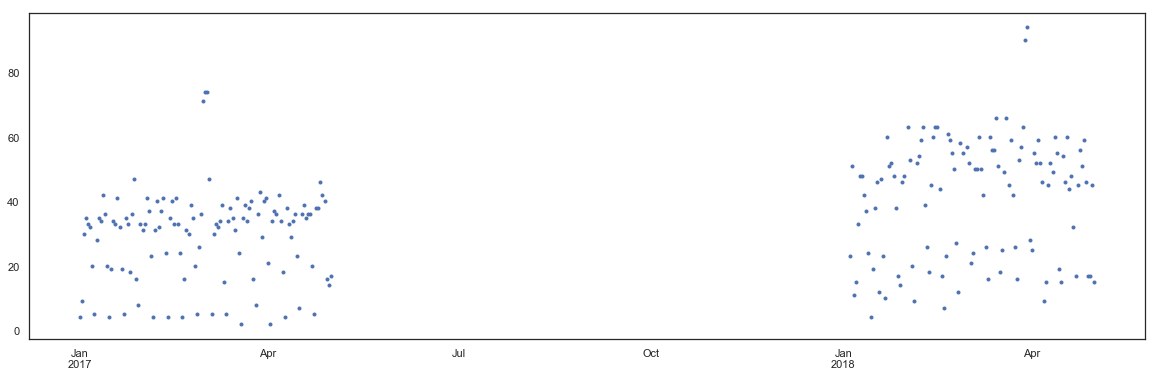

In [48]:
data_time.plot(figsize=(20,6), style= '.b')
plt.show()

The total number number of articles appears to increase in 2018. I'll perform joint plots for better comparison.

In [49]:
# data_time.articleID
year_groups = data_time.groupby(pd.Grouper(freq ='A'))

TypeError: 'TimeGrouper' object is not callable

In [50]:
year_groups.plot(figsize=(10,6), style='.b')

NameError: name 'year_groups' is not defined

In [51]:
# year_groups.plot(figsize = (18,10), subplots=False, legend=True)
# plt.show()

In [52]:
## update to plot subplots
articles_annual = pd.DataFrame()

# for yr, articleID in year_groups:
#     print(len(articleID.values.ravel()))
#     print(yr.year)
# year_groups.articleID.plot(figsize=(10,6))
articleID.values.ravel()
# articles_annual['2017'] = articleID.values.ravel() 
# articles_annual['2018'] = articleID.values.ravel()
#     articles_annual[yr.year] = articleID.values.ravel()
#     print(yr.year)
#     print(articleID)
    
# articles_annual
    
# Plot the yearly groups as subplots
# articles_annual.plot(figsize = (13,8), subplots=True, legend=True)
# plt.show()
# year_groups.head()

NameError: name 'articleID' is not defined

I would also be interested in this breakdown across categories.

In [53]:
category = data.groupby(['date','newDesk'], as_index=False)['articleID'].count()
category = pd.DataFrame(category)
category.head()

,date,newDesk,articleID
0,2017-01-01,Foreign,1
1,2017-01-01,Games,1
2,2017-01-01,National,1
3,2017-01-01,OpEd,1
4,2017-01-02,Culture,1


In [54]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3541 entries, 0 to 3540
Data columns (total 3 columns):
date         3541 non-null datetime64[ns]
newDesk      3541 non-null object
articleID    3541 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 110.7+ KB


I'll set the index for date

In [55]:
category.set_index('date', inplace=True)
category.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3541 entries, 2017-01-01 to 2018-05-01
Data columns (total 2 columns):
newDesk      3541 non-null object
articleID    3541 non-null int64
dtypes: int64(1), object(1)
memory usage: 83.0+ KB


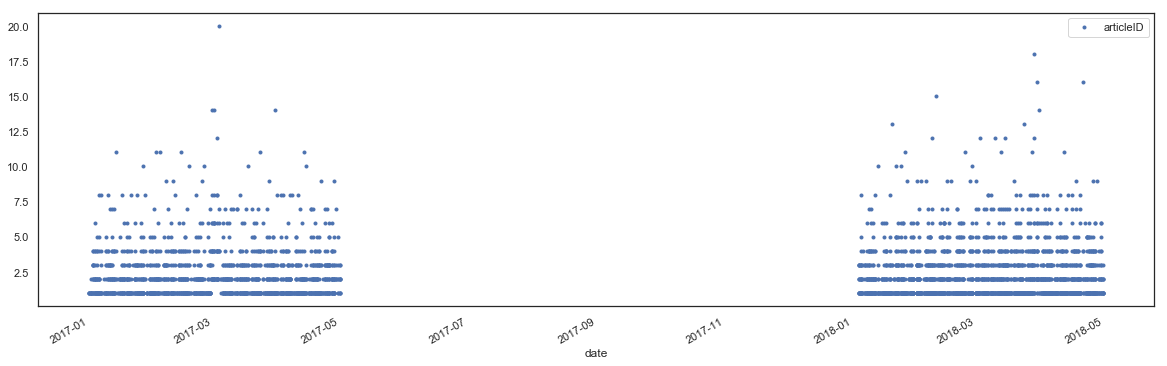

In [56]:
category.plot(figsize = (20,6), style = ".b")
plt.show()

Let me group into years.

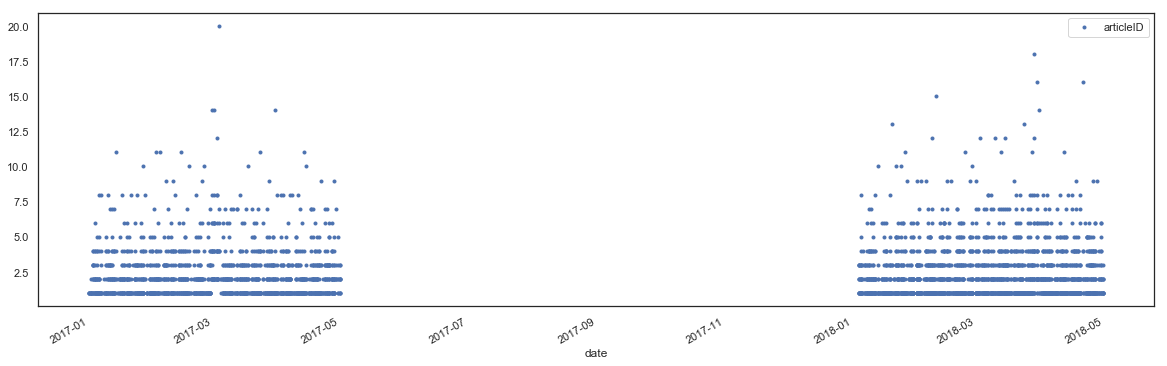

In [57]:
category.resample('A')
category.plot(figsize=(20,6), style = '.b')
# category_monthly.plot()

It's hard to identify any trends with this view. Let me break up across newsDeck category.

In [58]:
year_groups = category.groupby(pd.Grouper(freq ='A'))
year_groups.head()

,newDesk,articleID
date,,
2017-01-01,Foreign,1
2017-01-01,Games,1
2017-01-01,National,1
2017-01-01,OpEd,1
2017-01-02,Culture,1
2018-01-04,Business,3
2018-01-04,Climate,2
2018-01-04,Dining,1
2018-01-04,Learning,1


In [59]:
articles_annual = pd.DataFrame()
year_groups

In [60]:
for yr, group in year_groups:
    articles_annual[yr.year] = group.values.ravel()
#     print(yr.year)
#     print(newDesk)
#     print(len(newDesk.values.ravel()))
    
articles_annual
    
# Plot the yearly groups as subplots
# articles_annual.plot(figsize = (13,8), subplots=True, legend=True)
# plt.show()

ValueError: Length of values does not match length of index

In [61]:
# Use pandas grouper to group values using annual frequency
# year_groups = category.groupby(pd.Grouper(freq ='A'))
# year_groups.hist(figsize = (20, 6))
# plt.show()

In [62]:
#Create a new DataFrame and store yearly values in columns 
# cat_time = pd.DataFrame()

# for yr, group in year_groups:
#     nyse_annual[yr.year] = group.values.ravel()
    
# # Plot the yearly groups as subplots
# nyse_annual.plot(figsize = (13,8), subplots=True, legend=True)
# plt.show()

In [63]:
#list top ten categories

In [64]:
#time series modeling 

In [65]:
# start with basic time series model

In [66]:
# create newstrend dataframe?

In [67]:
# for categories, should i create dataframe with newDesk, one-hot encode, and then plot timeseries? or should i group by?

In [68]:
data_time_diff = data_time.diff().dropna()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'diff'

In [69]:
data_time_diff.plot(figsize=(10, 6))

NameError: name 'data_time_diff' is not defined

In [70]:
# data_time_shift_1= data_time.shift(periods=1)
# data_time_shift_1.head()

In [71]:
# lag_1 = pd.concat([data_time_shift_1, data_time], axis=1)
# lag_1.corr()

In [72]:
# lag_1.plot(figsize=(18, 10))

In [73]:
#move to top 


NameError: name 'data_time_diff' is not defined

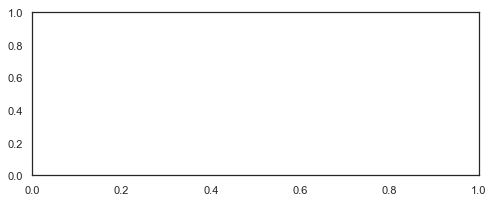

In [74]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(data_time_diff, ax=ax, lags=24);

NameError: name 'data_time_diff' is not defined

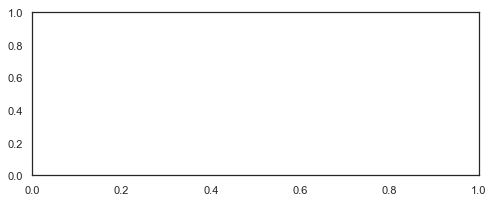

In [75]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(data_time_diff, ax=ax, lags=12);

In [76]:
#interpret this??

In [77]:
#move to top


In [78]:
mod_arma = ARMA(data_time_diff, order=(2,1))
res_arma = mod_arma.fit()

NameError: name 'data_time_diff' is not defined

In [79]:
print(res_arma.summary())
print(res_arma.params)

NameError: name 'res_arma' is not defined

In [80]:
#do same with different paramaters?
#is this final model?

In [81]:
# sARIMA model

In [82]:
data_time = data_time.fillna(data_time.bfill())

TypeError: Could not compare [None] with block values

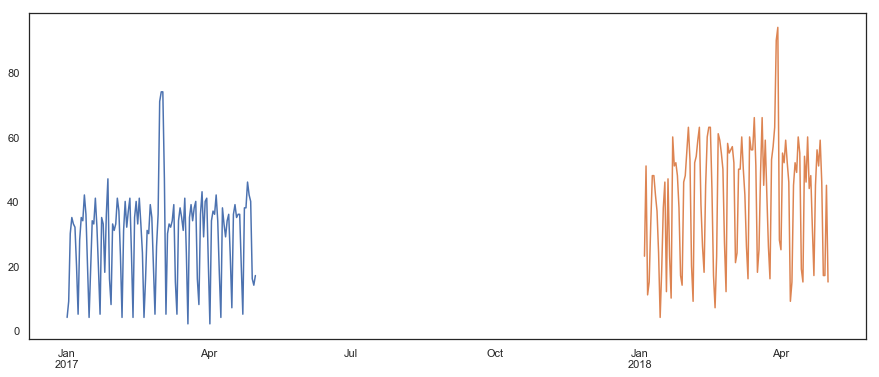

AttributeError: 'DatetimeIndexResampler' object has no attribute 'head'

In [83]:
data_time.plot(figsize=(15, 6))
plt.show()
print(data_time.head())

In [ ]:
p = d = q = range(0, 2)

In [84]:
pdq = list(itertools.product(p, d, q))

NameError: name 'p' is not defined

In [85]:
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

NameError: name 'p' is not defined

In [86]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_time,
                                           order = comb,
                                           seasonal_order = combs,
                                           enforce_stationarity= False,
                                           enforce_invertibility=False,)
            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated = {}'.format(comb, combs, output.aic))
        except:
            continue

NameError: name 'pdq' is not defined

In [87]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

TypeError: reduction operation 'argmin' not allowed for this dtype

In [88]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data_time,
                                       order=(0, 0, 1),
                                       seasonal_order=(0, 1, 1, 12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)

ValueError: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions

In [89]:
output = ARIMA_MODEL.fit()

NameError: name 'ARIMA_MODEL' is not defined

In [90]:
print(output.summary().tables[1])

NameError: name 'output' is not defined

In [91]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

NameError: name 'output' is not defined

In [92]:
pred = output.get_prediction(dynamic=False)
pred_conf = pred.conf_int()

NameError: name 'output' is not defined

NameError: name 'pred' is not defined

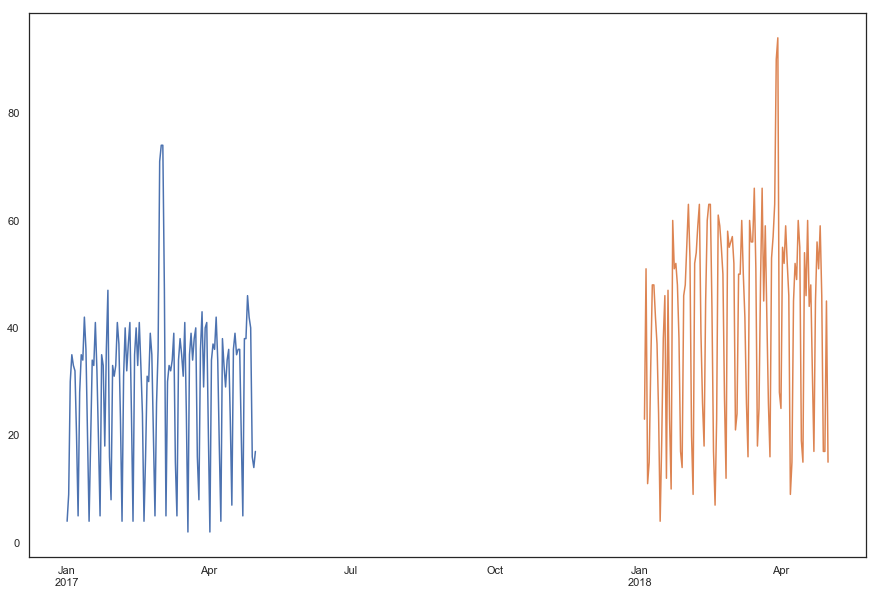

In [93]:
ax = data_time.plot(figsize=(15,10))
pred.predicted_mean.plot(ax=ax, alpha=.9)
ax.fill_between(pred_conf.index,
               pred_conf.iloc[:,0],
               pred_conf.iloc[:,1], color='g', alpha=.5)

ax.set_xlabel('Date')
ax.set_ylabel("Articles")
plt.legend()

plt.show()

In [ ]:
pred_dynamic = output.get_prediction(dynamic=True, full_results = True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [94]:
ax = data_time.plot(figsize=(20, 15))
pred_dynamic.

# ax.fill_between(pred_dynamic_conf.index,
#                pred_dynamic_conf.iloc[:, 0],
#                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)
# ax.fill_between(ax.get_ylim(), pd)
ax.set_xlabel('Date')
ax.set_ylabel('Articles')

plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-94-51ea0b75b906>, line 2)

__Perform Natural Language Processing__

In [ ]:
#create a list containing the name of every comment
comments_id = data2['commentID']
# comments_id

In [5]:
data2['editorsSelection'].unique()

array([0, 1])

In [6]:
df1 = data2[data2['editorsSelection']==1].reset_index()
df2 = data2[data2['editorsSelection']==0].reset_index()
df1.head()

,index,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,20,1517517545,5a7258e410f40f00018bed7d,835.0,"The comments regarding women, from some conser...",25792295.0,25792295.0,<br/>,comment,1.517512e+09,...,approved,1.0,0.0,Op-Ed,1517517545,M Martinez,8753109.0,Miami,NaN,NaN
1,22,1517517534,5a7258e410f40f00018bed7d,835.0,Well it's quite clear Claire McCaskill will ha...,25791862.0,25791862.0,<br/>,comment,1.517510e+09,...,approved,1.0,0.0,Op-Ed,1517517534,LaPine,68444410.0,Pacific Northwest,NaN,NaN
2,48,1517507617,5a7258e410f40f00018bed7d,835.0,I'll take a she-devil any day. Why are some m...,25783379.0,25783379.0,<br/>,comment,1.517460e+09,...,approved,1.0,0.0,Op-Ed,1517507618,Bert,52004385.0,PA,NaN,NaN
3,81,1517503055,5a7258e410f40f00018bed7d,835.0,"I am a radical feminist because I, like all wo...",25783943.0,25783943.0,<br/>,comment,1.517467e+09,...,approved,1.0,0.0,Op-Ed,1517503055,Erin,69555045.0,Israel,NaN,NaN
4,82,1517502698,5a7258e410f40f00018bed7d,835.0,"I stand with the ""she-devils"" too. Over and o...",25788001.0,25788001.0,<br/>,comment,1.517498e+09,...,approved,1.0,0.0,Op-Ed,1517502698,Meg,43061007.0,Canada,NaN,NaN


In [7]:
#organize by flagged comments and unflagged comments
selected = df1['commentBody']
regular = df2['commentBody']
len(regular)

1863871

In [9]:
# randomly select 30K comments from both regular and selected
df1 = np.random.choice(selected, 3000)
df2 = np.random.choice(selected, 3000)
# selected_30k = df1.str.split(' ')
# regular_30k = df2.str.split(' ')
df11 = df1
# df11.head()
# len(regular_30k)

In [13]:
## delete
df = pd.DataFrame(selected)
df['commentBody'][0]
selected_comments = df['commentBody']
selected_comments[1]

"Well it's quite clear Claire McCaskill will have no problem dispatching this anachronistic buffoon.  I'd also hint to the fiancee she could do a lot better an not much worse at present (hint: Wake up!).<br/>Trouble is Mr Kristof, when the tables are turned, it doesn't look different.  I spent my last 7 working years under a program manager who hired her 'friends' even though they were minimally qualified and not recommended by committees of her own appointing.  The sword of discrimination cuts both ways, and it was painful to see older, much more qualified candidates bypassed so she could select her running partner in one case.  Two wrongs will never make it right.  "

In [ ]:
### delete
# regular.to_frame().reset_index(inplace=True)
# selected.to_frame().reset_index(inplace=True)
# type(selected)
# selected.head()

In [ ]:
#view single comment to see what it looks like
selected_30k[0]

In [ ]:
### delete if not necessary
selected = selected.str.split(' ')
#create dateframes to store comments

In [45]:
selected[2]

"I'll take a she-devil any day.  Why are some men so scared of strong women?<br/>I guess they figure they can't compete without their traditional advantages.  Sad!"

_Tokenize the data_

In [46]:
### delete if not necessary

# for index in test_comment:
#     for comment in comments:
#     print(index)
len(selected[2])

162

In [57]:
#create function to clean each comment
#need to check comments for particular characters 
def clean_comment(comment):
    cleaned_comment = []
    for word in comment:
#         for char in word:
# #         if not '<' in word and  not 'b' in word and  not 'r' in word and not '/' in word and not '>' in word:
# #         breaks = "<br/>"
# #         if word == breaks:
# #             word = word.replace(breaks, '').lower()
# #         else:
#             for symbol in ",.?!/''":
#                 word = word.replace(symbol,'').lower()
#         cleaned_comment.append(word)
#     return cleaned_comment
        cleaned_comment.append(word)
    return cleaned_comment
# cleaned_comment
#         print(word)

In [58]:
test_comment

'The comments regarding women, from some conservatives, are simply outdated. This is not an era when the only possibility to work for them is as school teachers. Women are very smart thinkers. They helped put John Glenn in space, to mention just one case.<br/><br/>In addition when a father dies and the orphans need education and support, the best suited is usually their mother. You can see in many photographs of the war in Syria, that many babies or children are being protected by their mothers.<br/><br/>During its war against the Triple Alliance, Paraguay lost almost all its territory. Women were in charge of impeding the total collapse of their country because almost all men died. And they succeeded. Paraguay still exists thanks to its precious women.<br/><br/>Women can do anything. Marie Curry conducted pioneering research on radioactivity. Golda Meir was, by far, better than Netanyahu. Just read history and compare.<br/><br/>Long live women!'

In [59]:
# df_split = pd.DataFrame.from_items(zip(selected.index, selected.str.split(' ')))
# print(df_split)
clean_comment(test_comment)

['T',
 'h',
 'e',
 ' ',
 'c',
 'o',
 'm',
 'm',
 'e',
 'n',
 't',
 's',
 ' ',
 'r',
 'e',
 'g',
 'a',
 'r',
 'd',
 'i',
 'n',
 'g',
 ' ',
 'w',
 'o',
 'm',
 'e',
 'n',
 ',',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ',
 's',
 'o',
 'm',
 'e',
 ' ',
 'c',
 'o',
 'n',
 's',
 'e',
 'r',
 'v',
 'a',
 't',
 'i',
 'v',
 'e',
 's',
 ',',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 's',
 'i',
 'm',
 'p',
 'l',
 'y',
 ' ',
 'o',
 'u',
 't',
 'd',
 'a',
 't',
 'e',
 'd',
 '.',
 ' ',
 'T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'n',
 'o',
 't',
 ' ',
 'a',
 'n',
 ' ',
 'e',
 'r',
 'a',
 ' ',
 'w',
 'h',
 'e',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'p',
 'o',
 's',
 's',
 'i',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'w',
 'o',
 'r',
 'k',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 't',
 'h',
 'e',
 'm',
 ' ',
 'i',
 's',
 ' ',
 'a',
 's',
 ' ',
 's',
 'c',
 'h',
 'o',
 'o',
 'l',
 ' ',
 't',
 'e',
 'a',
 'c',
 'h',
 'e',
 'r',
 's',
 '.',
 ' ',
 'W',
 'o',
 'm',
 'e',
 'n',
 ' '

In [41]:
def test(comment):
    cleaned_comment = []
    comment_text = 

SyntaxError: invalid syntax (<ipython-input-41-0b53f8785fc9>, line 3)

In [42]:
# create variable comment to test with function
test_comment = selected[0]
test_comment

'The comments regarding women, from some conservatives, are simply outdated. This is not an era when the only possibility to work for them is as school teachers. Women are very smart thinkers. They helped put John Glenn in space, to mention just one case.<br/><br/>In addition when a father dies and the orphans need education and support, the best suited is usually their mother. You can see in many photographs of the war in Syria, that many babies or children are being protected by their mothers.<br/><br/>During its war against the Triple Alliance, Paraguay lost almost all its territory. Women were in charge of impeding the total collapse of their country because almost all men died. And they succeeded. Paraguay still exists thanks to its precious women.<br/><br/>Women can do anything. Marie Curry conducted pioneering research on radioactivity. Golda Meir was, by far, better than Netanyahu. Just read history and compare.<br/><br/>Long live women!'

In [43]:
# test function on example comment
clean_test = clean_comment(test_comment)
print(len(clean_test))
clean_test

1


['']

In [ ]:
# need to remove breaks from comments
# problem is that function is reading comment as one string rather than group of words

In [ ]:
#split each comment into an array of words


In [104]:
#write funtion to remove items that shouldnt be in comments

In [105]:
#write a function that takes in songs that have had their brackets removed, joins all of the lines into a single string, and then uses tokenize() on it to get a fully tokenized version of the song.

In [106]:
#create a function that takes in a tokenized, cleaned song and returns a Count Vectorized representation of it as a python dictionary.
def tokenize(comment):
    joined_comment = ' '.join(comment)
    tokenized_comment = word_tokenize(joined_comment)
    
    return tokenized_comment


In [107]:
tokenized_test_comment = tokenize(test_comment)
print(len(tokenized_test_comment))
tokenized_test_comment

NameError: name 'test_comment' is not defined

In [108]:
# create bag of words
def count_vectorize(comment, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(comment))
        
    comment_dict = {i:0 for i in unique_words}
    
    for word in comment:
        comment_dict[word] += 1
    
    return comment_dict

In [109]:
test_vectorized = count_vectorize(tokenized_test_comment)
print(test_vectorized)

NameError: name 'tokenized_test_comment' is not defined

In [110]:
#complete tf-idf vectorization

In [111]:
#Calculate term frequency for every term in a document.
def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

In [112]:
test = term_frequency(test_vectorized)
print(test)

NameError: name 'test_vectorized' is not defined

In [113]:
# Calculate inverse document frequency
def inverse_document_frequency(list_of_dicts):
    vocab_set = set()
    for d in list_of_dicts:
        for word in d.keys():
            vocab_set.add(word)
    full_vocab_dict = {i:0 for i in vocab_set}
    
    for word, val in full_vocab_dict.items():
        docs = 0
        
        
        for d in list_of_dicts:
            if word in d:
                docs += 1
                
        full_vocab_dict[word] = np.log((len(list_of_dicts) / float(docs)))
    
    return full_vocab_dict

In [114]:
# compute TF-IDF
def tf_idf(list_of_dicts):
    doc_tf_idf = {}
    idf = inverse_document_frequency(list_of_dicts)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    tf_idf_list_of_dicts = []
    
    for doc in list_of_dicts:
        doc_tf = term_frequency(doc)
        for word in doc_tf:
            doc_tf_idf[word] = doc_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
        
    return tf_idf_list_of_dicts

In [115]:
# vectorize all comments

In [116]:
def vectorize_all(comments):
    count_vectorized_all_documents = []
    for comment in comments:
        cleaned = clean_comment(comment)
        tokenized = tokenize(cleaned)
        
        count_vectorized_document = count_vectorize(tokenized)
        count_vectorized_all_documents.append(count_vectorized_document)
    tf_idf_all_docs = tf_idf(count_vectorized_all_documents)
    
    return tf_idf_all_docs

In [117]:
tf_idf_selected = vectorize_all(selected_30k)
tf_idf_regular = vectorize_all(regular_30k)

NameError: name 'selected_30k' is not defined

In [118]:
tf_idf_regular

NameError: name 'tf_idf_regular' is not defined

In [119]:
# visualize all comments

In [120]:
#create list of lists
tf_idf_vals_list = []

for i in tf_idf_selected:
    tf_idf_vals_list.append(list(i.values()))
for i in tf_idf_regular:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0]

NameError: name 'tf_idf_selected' is not defined

In [121]:
t_sne_object_3d = TSNE(n_components = 3)

In [122]:
## need to debug this error
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)
transformed_data_3d


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

__Create model to classify comments as selected or not__

In [123]:
#create dataframe

In [124]:
#move to top


In [125]:
# #create KNN class
# class KNN(object):
#     def fit():
#         pass
#     def predict():
#         pass

In [126]:
# #complete the fit method
# def fit(self, X_train, y_train):
#     self.X_train = X_train
#     self.y_train = y_train

In [127]:
# #point knn.fit to fit funtion
# KNN.fit = fit

In [128]:
# #helper function for predict function
# def _get_distances(self, x):
#     distances = []
#     for ind, val in enumerate(self.X_train):
#         dist_to_i = euc(x, val)
#         distances.append((ind, dist_to_i))
#     return distances

In [129]:
# #attach method function to KNN class
# KNN._get_distances = _get_distances

In [130]:
## complete _get_k_nearest function
# def _get_k_nearest(self, dists, k):
#     sorted_dists = sorted(dists, key=lambda x: x[1])
#     return sorted_dists[:k]

In [131]:
#attach method function to KNN class
# KNN._get_k_nearest = _get_k_nearest

In [132]:
##complete _get_label_prediction() function
# def _get_label_prediction(self, k_nearest):
#     labels = [self.y_train[i] for i, _ in k_nearest]
#     counts = np.bincount(labels)
#     return np.argmax(counts)

In [133]:
#attach method function to KNN class
# KNN._get_label_prediction = _get_label_prediction

In [134]:
##complete predict method
# def predict(self, X_test, k=3):
#     preds = []
#     for i in X_test:
#         dists = self._get_distances(i)
#         k_nearest = self._get_distances(dists, k)
#         predicted_label = self._get_label_prediction(k_nearest)
#         preds.append(predicted_label)
#     return preds

# KNN.predict = predict

In [135]:
##create target df for test, train, split
# knn_data = data2.drop('editorsSelection', axis=1).copy()
# knn_target = data2['editorsSelection'].copy()

In [136]:
# knn_target.head()

In [137]:
## test, train, split
# X_train, X_test, y_train, y_test = train_test_split(knn_data, knn_target, test_size = .25)

In [138]:
##instantiate knn object and fit data in X_train
# knn = KNN()
# knn.fit(X_train, y_train)

In [139]:
# preds = knn.predict(X_test)
## is this error because of categorical columns??

In [140]:
# #test accuracy
# print("Testing Accuracy: {}".format(accuracy_score(y_test, preds)))

In [4]:
#add wordcount of commentBody
data2['commentBodyWordCount'] = data2['commentBody'].str.len().copy()

In [5]:
data2['commentBodyWordCount'].head()

0     98
1     29
2     32
3     75
4    239
Name: commentBodyWordCount, dtype: int64

In [6]:
#drop unnecessary columns
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899975 entries, 0 to 1899974
Data columns (total 35 columns):
approveDate              int64
articleID                object
articleWordCount         float64
commentBody              object
commentID                float64
commentSequence          float64
commentTitle             object
commentType              object
createDate               float64
depth                    float64
editorsSelection         int64
inReplyTo                float64
newDesk                  object
parentID                 float64
parentUserDisplayName    object
permID                   object
picURL                   object
printPage                float64
recommendations          float64
recommendedFlag          float64
replyCount               float64
reportAbuseFlag          float64
sectionName              object
sharing                  int64
status                   object
timespeople              float64
trusted                  float64
typeOfMateri

In [73]:
# class_data = data2.drop(['userURL', 'commentBody','commentTitle', 'parentUserDisplayName','recommendedFlag','reportAbuseFlag','sectionName','userDisplayName','userLocation','userTitle', 'permID', 'editorsSelection', 'userID', 'commentID'], axis=1)
class_data = data2[['articleWordCount','commentType','depth','newDesk','sharing','status', 'timespeople','trusted','typeOfMaterial','recommendations','replyCount','commentBodyWordCount']]
class_target = data2['editorsSelection']
## should i remove all columns with nulls? or remove rows with nulls? or fill with value?

In [22]:
#check for nulls
# class_data.isna().sum()

In [34]:
#check for potential # of rows with label encoding
class_data.nunique()
#will need to bin some of the columns

articleWordCount        2205
commentType                3
depth                      5
newDesk                   43
sharing                    2
status                     1
timespeople                2
trusted                    2
typeOfMaterial            14
recommendations         2591
replyCount               171
commentBodyWordCount    1998
dtype: int64

In [ ]:
#update data type for updateDate

In [36]:
one_hot_class_data = pd.get_dummies(class_data)
## takes too much time and computing power
one_hot_class_data.head()

,articleWordCount,depth,sharing,timespeople,trusted,recommendations,replyCount,commentBodyWordCount,commentType_comment,commentType_reporterReply,...,typeOfMaterial_Editorial,typeOfMaterial_Interview,typeOfMaterial_Letter,typeOfMaterial_News,typeOfMaterial_News Analysis,typeOfMaterial_Obituary (Obit),typeOfMaterial_Op-Ed,typeOfMaterial_Question,typeOfMaterial_Review,typeOfMaterial_briefing
0,835.0,1.0,0,1.0,0.0,5.0,0.0,98,1,0,...,0,0,0,0,0,0,1,0,0,0
1,835.0,1.0,0,1.0,0.0,2.0,0.0,29,1,0,...,0,0,0,0,0,0,1,0,0,0
2,835.0,1.0,0,1.0,0.0,1.0,0.0,32,1,0,...,0,0,0,0,0,0,1,0,0,0
3,835.0,1.0,0,1.0,0.0,6.0,0.0,75,1,0,...,0,0,0,0,0,0,1,0,0,0
4,835.0,1.0,0,1.0,0.0,2.0,0.0,239,1,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
#move to top
from sklearn.preprocessing import StandardScaler
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [38]:
scaler = StandardScaler()

In [39]:
scaled_data = scaler.fit_transform(one_hot_class_data)

In [42]:
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_class_data.columns)
scaled_df.head()

,articleWordCount,depth,sharing,timespeople,trusted,recommendations,replyCount,commentBodyWordCount,commentType_comment,commentType_reporterReply,...,typeOfMaterial_Editorial,typeOfMaterial_Interview,typeOfMaterial_Letter,typeOfMaterial_News,typeOfMaterial_News Analysis,typeOfMaterial_Obituary (Obit),typeOfMaterial_Op-Ed,typeOfMaterial_Question,typeOfMaterial_Review,typeOfMaterial_briefing
0,-0.512225,-0.593088,-0.304752,0.206597,-0.190077,-0.142190,-0.191384,-0.877470,0.599646,-0.012525,...,-0.267828,-0.010688,-0.026556,-1.112234,-0.104598,-0.047964,1.360474,-0.018457,-0.085483,-0.051207
1,-0.512225,-0.593088,-0.304752,0.206597,-0.190077,-0.170997,-0.191384,-1.061969,0.599646,-0.012525,...,-0.267828,-0.010688,-0.026556,-1.112234,-0.104598,-0.047964,1.360474,-0.018457,-0.085483,-0.051207
2,-0.512225,-0.593088,-0.304752,0.206597,-0.190077,-0.180600,-0.191384,-1.053948,0.599646,-0.012525,...,-0.267828,-0.010688,-0.026556,-1.112234,-0.104598,-0.047964,1.360474,-0.018457,-0.085483,-0.051207
3,-0.512225,-0.593088,-0.304752,0.206597,-0.190077,-0.132588,-0.191384,-0.938970,0.599646,-0.012525,...,-0.267828,-0.010688,-0.026556,-1.112234,-0.104598,-0.047964,1.360474,-0.018457,-0.085483,-0.051207
4,-0.512225,-0.593088,-0.304752,0.206597,-0.190077,-0.170997,-0.191384,-0.500448,0.599646,-0.012525,...,-0.267828,-0.010688,-0.026556,-1.112234,-0.104598,-0.047964,1.360474,-0.018457,-0.085483,-0.051207


In [43]:
#create train and test sets
X_train, X_test, y_train, y_test = train_test_split(one_hot_class_data, class_target, test_size=.25)

In [45]:
#create and fit KNN Model
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
test_preds = clf1.predict(X_test)

In [51]:
def print_metrics(labels, preds):
#     print("Precision Score:{}".format(precision_score(class_target, preds)))
#     print("Recall Score:{}".format(recall_score(class_target, preds)))
    print("Accuracy Score: {}".format(accuracy_score(class_target, preds)))
    print("F1 Score: {}".format(f1_score(class_target, preds)))

In [52]:
print_metrics(y_test, test_preds)

ValueError: Found input variables with inconsistent numbers of samples: [1899975, 474994]

In [56]:
class_target.shape[0]

1899975

In [55]:
one_hot_class_data.shape[0]
## the error above is supposed to be due to shape mismatch but not apparent here

1899975

KNN may not be appropriate for this dataset. I'll use pipeline approach.

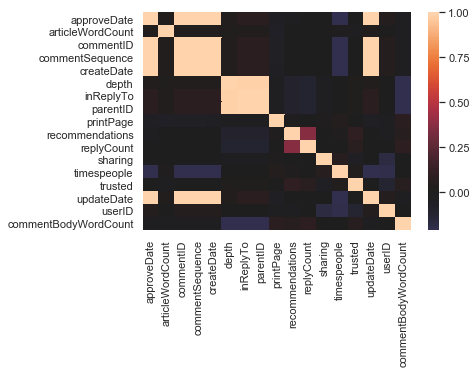

In [146]:
# look at correlation structure of features
sns.heatmap(class_data.corr(), center=0);
#change data name

In [71]:
pca_1 = PCA(n_components=10)
pca_2 = PCA(n_components=20)
pca_3 = PCA(n_components=25)

In [75]:
class_data.head()

,articleWordCount,commentType,depth,newDesk,sharing,status,timespeople,trusted,typeOfMaterial,recommendations,replyCount,commentBodyWordCount
0,835.0,comment,1.0,OpEd,0,approved,1.0,0.0,Op-Ed,5.0,0.0,98
1,835.0,comment,1.0,OpEd,0,approved,1.0,0.0,Op-Ed,2.0,0.0,29
2,835.0,comment,1.0,OpEd,0,approved,1.0,0.0,Op-Ed,1.0,0.0,32
3,835.0,comment,1.0,OpEd,0,approved,1.0,0.0,Op-Ed,6.0,0.0,75
4,835.0,comment,1.0,OpEd,0,approved,1.0,0.0,Op-Ed,2.0,0.0,239


In [76]:
principalComponents = pca_1.fit_transform(one_hot_class_data)
principalComponents = pca_2.fit_transform(one_hot_class_data)
principalComponents = pca_3.fit_transform(one_hot_class_data)

In [80]:
print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.9999995469557336
0.9999998471629259
0.9999999104133879


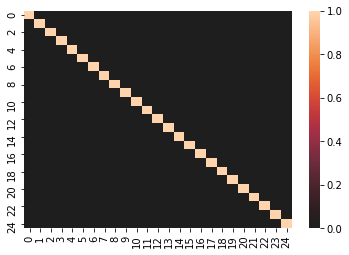

In [81]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

In [83]:
y = class_target
X = one_hot_class_data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [85]:
#move to top
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [94]:
#create a baseline model
pipe_lr = Pipeline([('pca', PCA(n_components=20)),('clf', LogisticRegression())])
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [95]:
print(pipe_lr.score(X_test, y_test))

0.9820971328570113


In [96]:
np.sum(pipe_lr.predict(X_test)== y_test)/len(y_test)

0.9820971328570113

In [91]:
len(y_test)

759990

In [93]:
#move to top
from sklearn import svm 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [97]:
pipe_svm = Pipeline([('pca', PCA(n_components=20)), ('clf', svm.SVC())])

In [99]:
pipe_tree = Pipeline([('pca', PCA(n_components=20)), ('clf', tree.DecisionTreeClassifier())])

In [100]:
pipe_rf = Pipeline([('pca', PCA(n_components=20)), ('clf', RandomForestClassifier())])

In [101]:
#List of pipelines, names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine', 'Decision Tree', 'Random Forest']

In [ ]:
#Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

#takes a while to run. need to review for issues / look up expected run time

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])


In [57]:
# test_set = data2[['articleWordCount','commentType','depth','newDesk','sharing','status', 'timespeople','trusted','typeOfMaterial','recommendations','replyCount','commentBodyWordCount']]

In [58]:
# test_one_hot = pd.get_dummies(test_set)

In [12]:
#try scikit decision tree

In [77]:
# class_data.shape

In [59]:
# add to top
from sklearn.preprocessing import LabelEncoder

In [60]:
#create label encoder instance
lb = LabelEncoder()

In [78]:
# class_target.to_frame()

In [61]:
#create numerical labels for classes
class_data['replyCount_'] = lb.fit_transform(class_data['replyCount'])
class_data['newDesk_'] = lb.fit_transform(class_data['newDesk'])
class_target = lb.fit_transform(class_target)

In [62]:
#the number of columns that articleID would create is too great and likely not helpful. It is important to note frequent commentors; ill create a new column with number of comments provided to date

In [63]:
#Instantiate a one hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [64]:
enc.fit(class_data)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [65]:
onehotX = enc.transform(class_data)

In [66]:
onehotX, onehotX.shape, class_data.shape

(<1899975x7251 sparse matrix of type '<class 'numpy.float64'>'
 	with 26599650 stored elements in Compressed Sparse Row format>,
 (1899975, 7251),
 (1899975, 14))

In [67]:
#create a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(onehotX, class_target, test_size=.3)

In [68]:
#fit model and make predictions

In [69]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
class_target.value_counts()

0    1863871
1      36104
Name: editorsSelection, dtype: int64

In [14]:
#perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(class_data, class_target, test_size=.20)

In [15]:
#Train DT classifier
classifier = DecisionTreeClassifier()

In [16]:
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: '58799bc395d0e0392607ab08'

In [9]:
data2['sectionName'].nunique()

62

In [30]:
data2['replyCount'][123]

1.0